<a href="https://colab.research.google.com/github/divya-160106/Fingerprint-Extraction/blob/main/Fingerprint_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

def preprocess_fingerprint(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    sobelx = cv2.Sobel(thresh, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(thresh, cv2.CV_64F, 0, 1, ksize=3)
    edge_detected = cv2.magnitude(sobelx, sobely)
    edge_detected = np.uint8(edge_detected)
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(edge_detected, cv2.MORPH_CLOSE, kernel, iterations=2)

    return morph

In [ ]:
def extract_fingerprint(image_path, output_path):
    processed_image = preprocess_fingerprint(image_path)
    cv2.imwrite(output_path, processed_image)
    print(f'Fingerprint saved to {output_path}')
    cv2_imshow(processed_image)

Saving Finger.jpg to Finger.jpg
Fingerprint saved to fingerprint_extracted.jpg


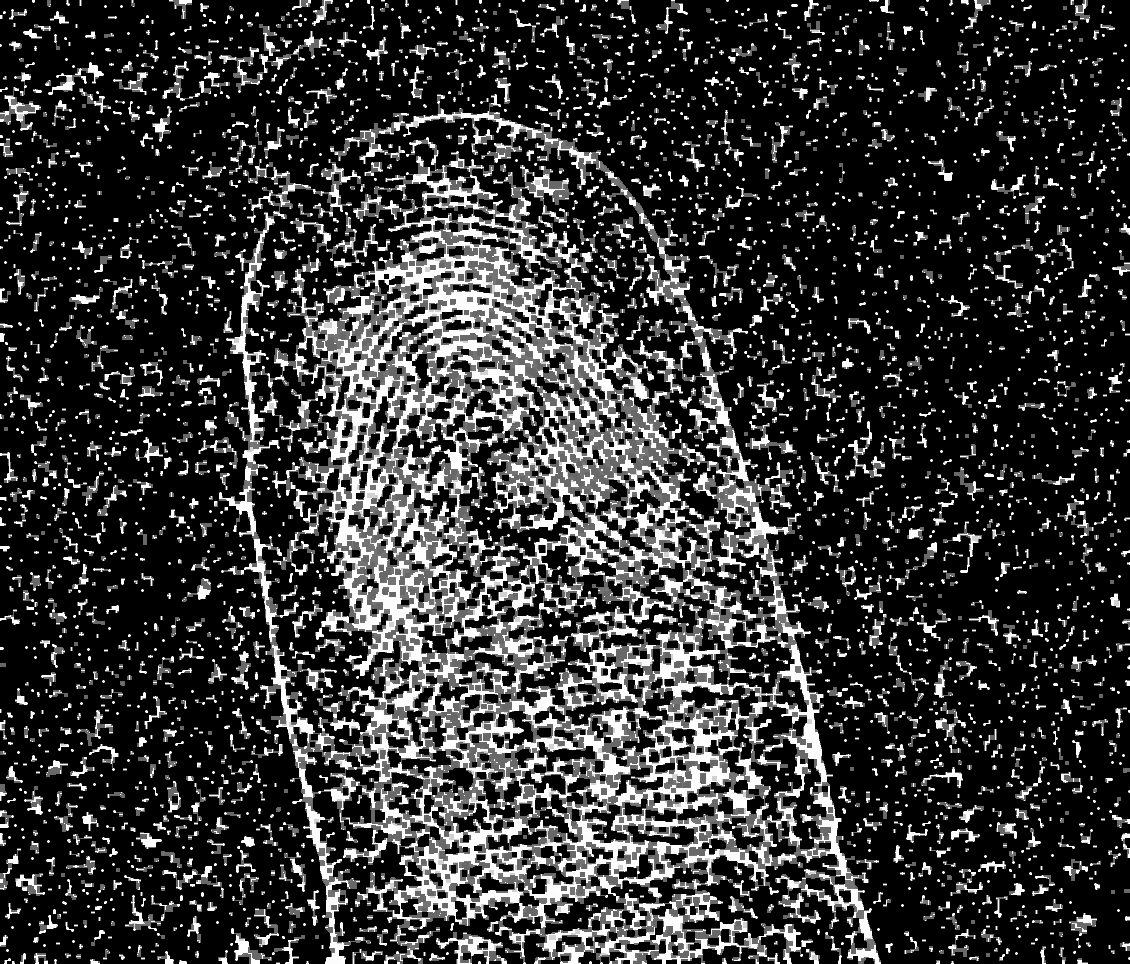

In [ ]:
uploaded = files.upload()
input_image_path = list(uploaded.keys())[0]
output_image_path = "fingerprint_extracted.jpg"
extract_fingerprint(input_image_path, output_image_path)